In [1]:
# Source: https://medium.com/@devesh_kumar/building-a-simple-spam-classifier-using-scikit-learn-d3a84e6f3112
import pandas as pd
from langdetect import detect
import matplotlib
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('./spam.csv',encoding='ISO-8859-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Finding null values
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
def get_language(text):
    try:
        return detect(text)
    except:
        print("Erroneous text ",text)
        return "unknown"

In [8]:
data['lang'] = data['v2'].apply(get_language)

Erroneous text  645
Erroneous text  :) 
Erroneous text  :-) :-)


In [9]:
data.head(5)

,v1,v2,lang
0,ham,"Go until jurong point, crazy.. Available only ...",en
1,ham,Ok lar... Joking wif u oni...,af
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,ham,U dun say so early hor... U c already then say...,en
4,ham,"Nah I don't think he goes to usf, he lives aro...",en


<Axes: xlabel='lang'>

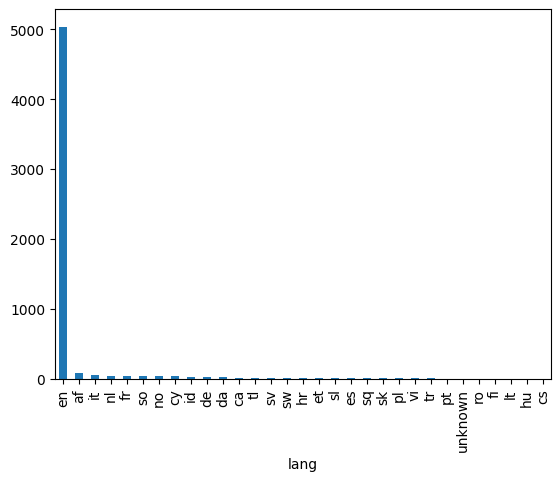

In [10]:
data['lang'].value_counts().plot(kind='bar')

In [12]:
# Since the majority of texts in our sample are in english, we can improve our accuracy on predicting english texts as "spam" or "ham" by dropping all non-english columns.
# Maybe we can build a language aware spam/ham detector in the future?? :)))

non_english_pos = data[data['lang']!='en'].index
non_english_pos

Index([   1,   14,   38,   43,   46,   72,   80,  111,  125,  130,
       ...
       5469, 5471, 5504, 5512, 5514, 5541, 5543, 5558, 5563, 5565],
      dtype='int64', length=535)

In [13]:
only_en = data.drop(index=non_english_pos)
only_en

,v1,v2,lang
0,ham,"Go until jurong point, crazy.. Available only ...",en
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,ham,U dun say so early hor... U c already then say...,en
4,ham,"Nah I don't think he goes to usf, he lives aro...",en
5,spam,FreeMsg Hey there darling it's been 3 week's n...,en
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,en
5568,ham,Will Ì_ b going to esplanade fr home?,en
5569,ham,"Pity, * was in mood for that. So...any other s...",en
5570,ham,The guy did some bitching but I acted like i'd...,en


In [14]:
# Rechecking if it worked
only_en['lang'].unique()

array(['en'], dtype=object)

In [15]:
import matplotlib.pyplot
def generate_wordcloud(text):
    wc = WordCloud(stopwords=STOPWORDS,background_color='white')
    wc.generate(text)

    matplotlib.pyplot.imshow(wc)
    matplotlib.pyplot.axis("off")
    matplotlib.pyplot.show()

In [16]:
spam_data = data[data['v1'] == 'spam']
spam_words = "".join(spam_data["v2"])
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

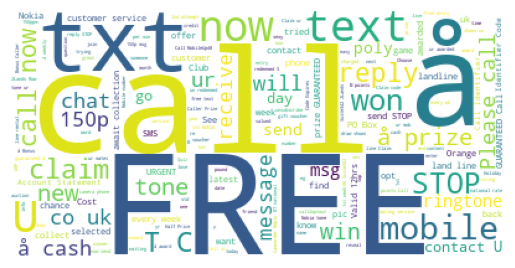

In [17]:
generate_wordcloud(spam_words)

<Axes: xlabel='v1'>

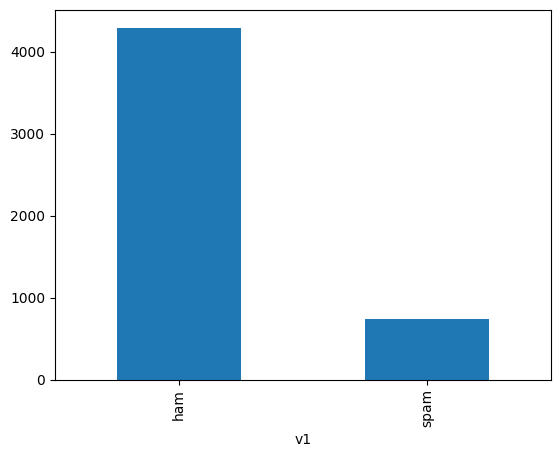

In [18]:
# Checking Class Imbalance
only_en["v1"].value_counts().plot(kind="bar")

In [19]:
# Changing the label to a numerical value
only_en['v1'] = only_en['v1'].apply(lambda x: 1 if x == "spam" else 0)
only_en.rename(columns={'v1':'label','v2':'text'},inplace= True)
only_en

,label,text,lang
0,0,"Go until jurong point, crazy.. Available only ...",en
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives aro...",en
5,1,FreeMsg Hey there darling it's been 3 week's n...,en
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,en
5568,0,Will Ì_ b going to esplanade fr home?,en
5569,0,"Pity, * was in mood for that. So...any other s...",en
5570,0,The guy did some bitching but I acted like i'd...,en


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(only_en['text'],only_en['label'], test_size=0.2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_train_list = x_train.to_list()

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english"
)

train_feature = vectorizer.fit_transform(x_train_list)
test_feature = vectorizer.transform(x_test)


In [23]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(train_feature,y_train)

accuracy = model.score(test_feature,y_test)

accuracy

0.9662698412698413

In [31]:
res = model.predict(vectorizer.transform(["You have won Free entry in 2 a wkly comp to win trophy "]))
res[0]


np.int64(1)